# Prepare data

In [1]:
import pandas as pd

# load data
data = pd.read_csv('energie.csv')

# column date to datetime format
data['date'] = pd.to_datetime(data['date'])

# Извлечение дополнительных данных
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.day_name()
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

data

,date,carbune,consum,hidro,hidrocarburi,nuclear,eolian,productie,fotovolt,biomasa,sold,hour,day_of_week,day,month,year
0,2024-11-23 19:08:34,829,7762,1166,1638,1359,1414,6469,-2,40,1292,19,Saturday,23,11,2024
1,2024-11-23 18:50:28,817,7804,1205,1631,1364,1281,6360,-2,41,1443,18,Saturday,23,11,2024
2,2024-11-23 18:00:33,821,7971,1495,1720,1366,1104,6553,-2,41,1418,18,Saturday,23,11,2024
3,2024-11-23 17:55:04,822,7990,1441,1726,1364,1103,6504,-2,42,1485,17,Saturday,23,11,2024
4,2024-11-23 17:47:22,832,7981,1436,1722,1368,1104,6507,-2,42,1473,17,Saturday,23,11,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2024-11-21 00:30:34,831,5971,1048,1667,1386,2260,7224,-2,31,-1252,0,Thursday,21,11,2024
486,2024-11-21 00:25:05,836,6088,1048,1668,1387,2267,7238,-2,32,-1150,0,Thursday,21,11,2024
487,2024-11-21 00:17:25,833,6102,1055,1665,1385,2263,7235,-2,32,-1132,0,Thursday,21,11,2024
488,2024-11-21 00:08:05,834,6120,1130,1654,1383,2271,7309,-2,35,-1188,0,Thursday,21,11,2024


# Diagrama distributiei pe tipuri de energie (Диаграмма распределения по типам энергии)

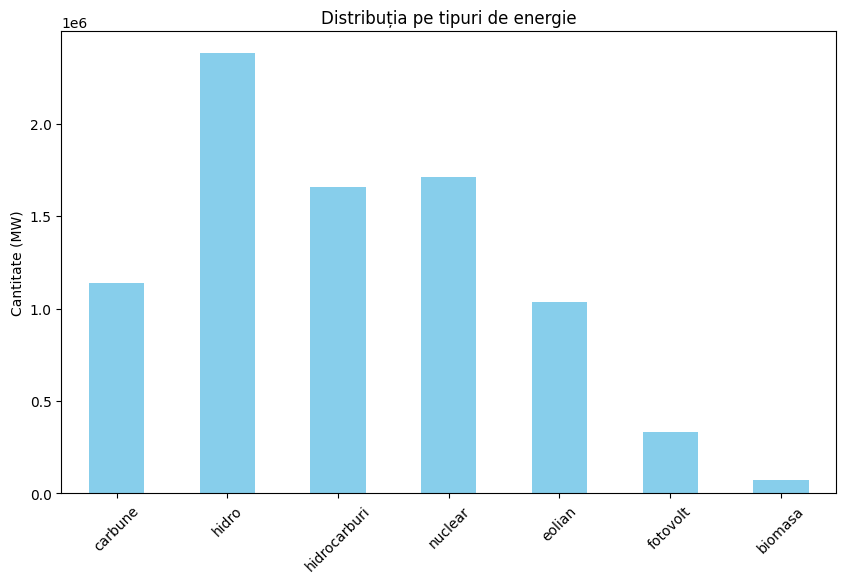

In [ ]:
import matplotlib.pyplot as plt

energy_types = ['carbune', 'hidro', 'hidrocarburi', 'nuclear', 'eolian', 'fotovolt', 'biomasa']

# sum for each type of energy
energy_distribution = data[energy_types].sum()

# diagram
plt.figure(figsize=(10, 6))
energy_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribuția pe tipuri de energie')
plt.ylabel('Cantitate (MW)')
plt.xticks(rotation=45)
plt.show()

# Diagrama pe luni comparativa pe export/producere de energie (Диаграмма по месяцам (экспорт/производство))

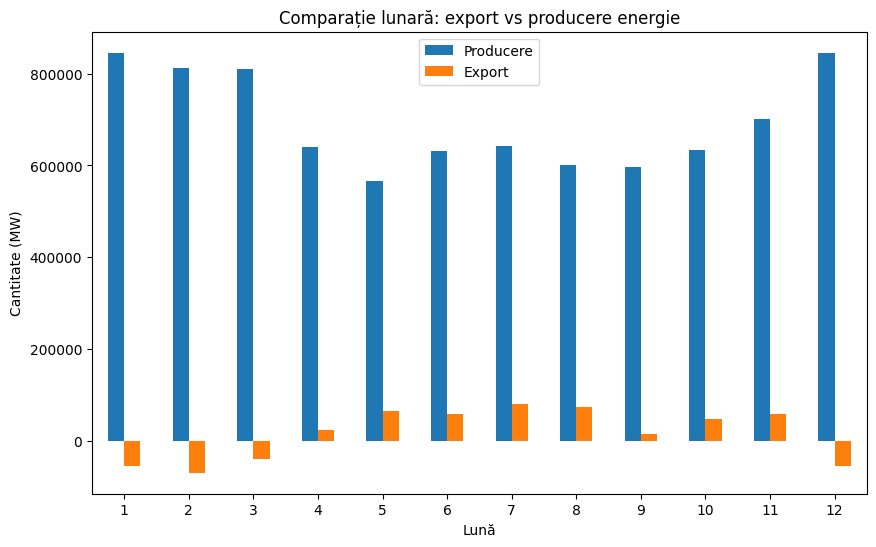

In [ ]:
monthly_data = data.groupby(data['month'])[['productie', 'sold']].sum()


# Построение сравнительной диаграммы
monthly_data.plot(kind='bar', figsize=(10, 6))
plt.title('Comparație lunară: export vs producere energie')
plt.ylabel('Cantitate (MW)')
plt.xlabel('Lună')
plt.xticks(rotation=0)
plt.legend(['Producere', 'Export'])
plt.show()

# Diagrame ce reflecta valorile de virf (Диаграммы пиковых значений)

## de ore

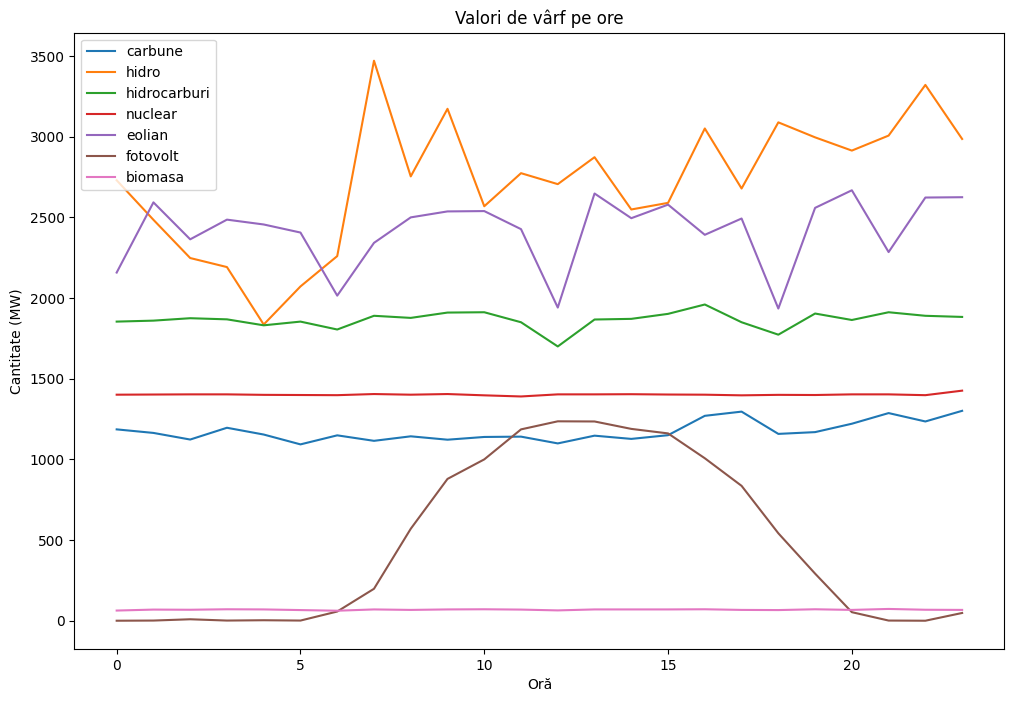

In [ ]:
hourly_peaks = data.groupby('hour')[energy_types].max()

# diagram
hourly_peaks.plot(figsize=(12, 8))
plt.title('Valori de vârf pe ore')
plt.ylabel('Cantitate (MW)')
plt.xlabel('Oră')
plt.legend(energy_types)
plt.show()

## zile a saptamanii:

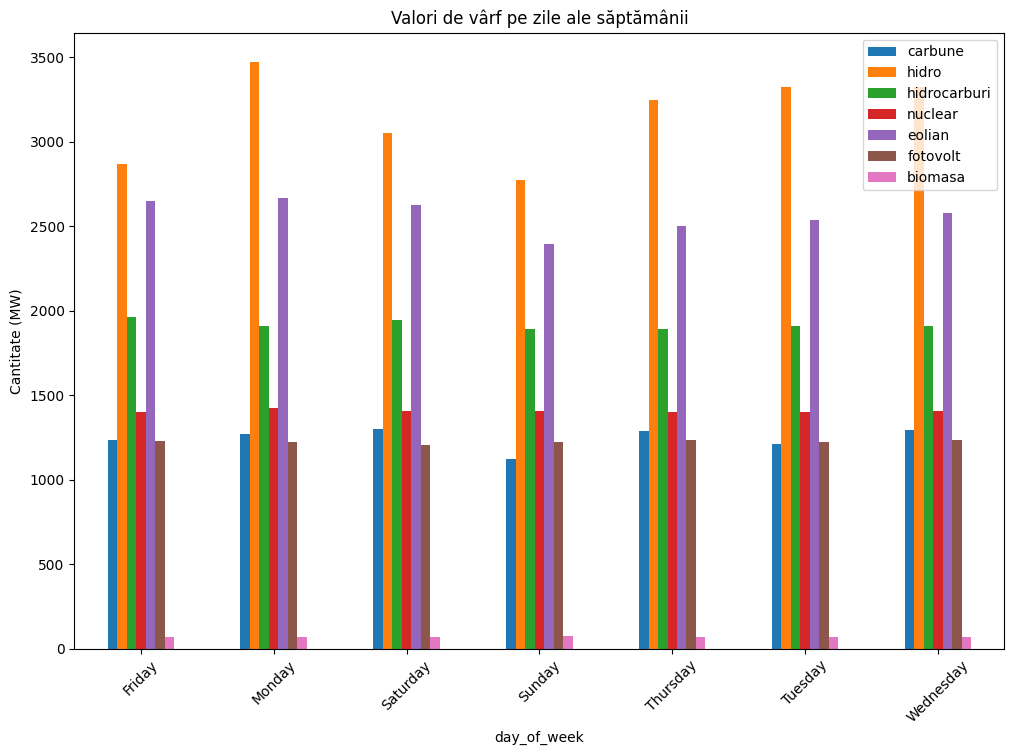

In [ ]:
weekly_peaks = data.groupby('day_of_week')[energy_types].max()

# Построение диаграммы
weekly_peaks.plot(kind='bar', figsize=(12, 8))
plt.title('Valori de vârf pe zile ale săptămânii')
plt.ylabel('Cantitate (MW)')
plt.xticks(rotation=45)
plt.legend(energy_types)
plt.show()

## Luni:

<Figure size 1200x800 with 0 Axes>

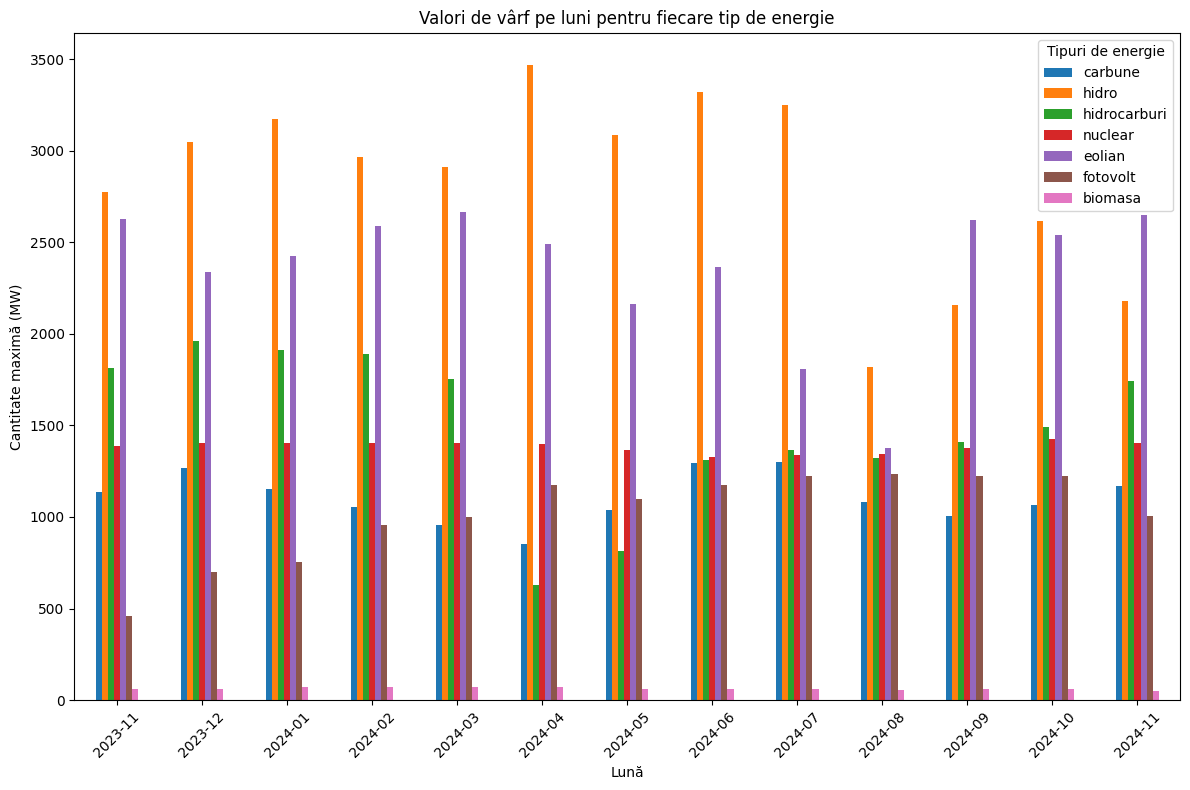

In [ ]:
# Группировка данных по годам и месяцам, затем нахождение максимальных значений
monthly_peaks = data.groupby(['year', 'month'])[energy_types].max()

monthly_peaks.index = [f"{year}-{month:02d}" for year, month in monthly_peaks.index]

# Построение диаграммы пиковых значений
plt.figure(figsize=(12, 8))
monthly_peaks.plot(kind='bar', figsize=(12, 8))
plt.title('Valori de vârf pe luni pentru fiecare tip de energie')
plt.ylabel('Cantitate maximă (MW)')
plt.xlabel('Lună')
plt.xticks(rotation=45)
plt.legend(title="Tipuri de energie")
plt.tight_layout()
plt.show()


# Diagrama comparativa de serii temporale pe fiecare tip de energie - pe ore, zile, luni

## Ori

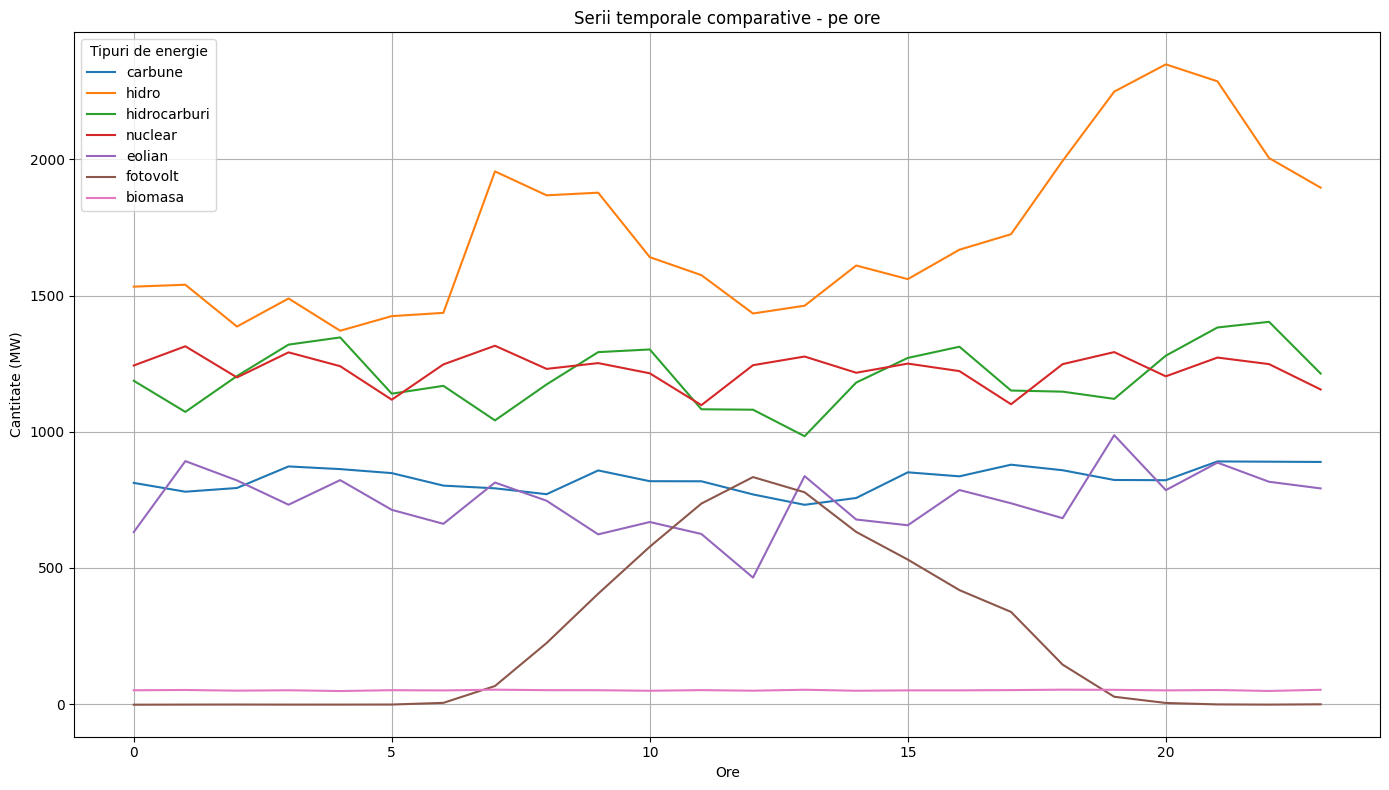

In [ ]:


hourly_series = data.groupby(['month', 'day', 'hour'])[energy_types].sum()


plt.figure(figsize=(14, 8))
for energy in energy_types:
    hourly_series[energy].groupby('hour').mean().plot(label=energy)
plt.title('Serii temporale comparative - pe ore')
plt.xlabel('Ore')
plt.ylabel('Cantitate (MW)')
plt.legend(title="Tipuri de energie")
plt.grid(True)
plt.tight_layout()
plt.show()


# Zile

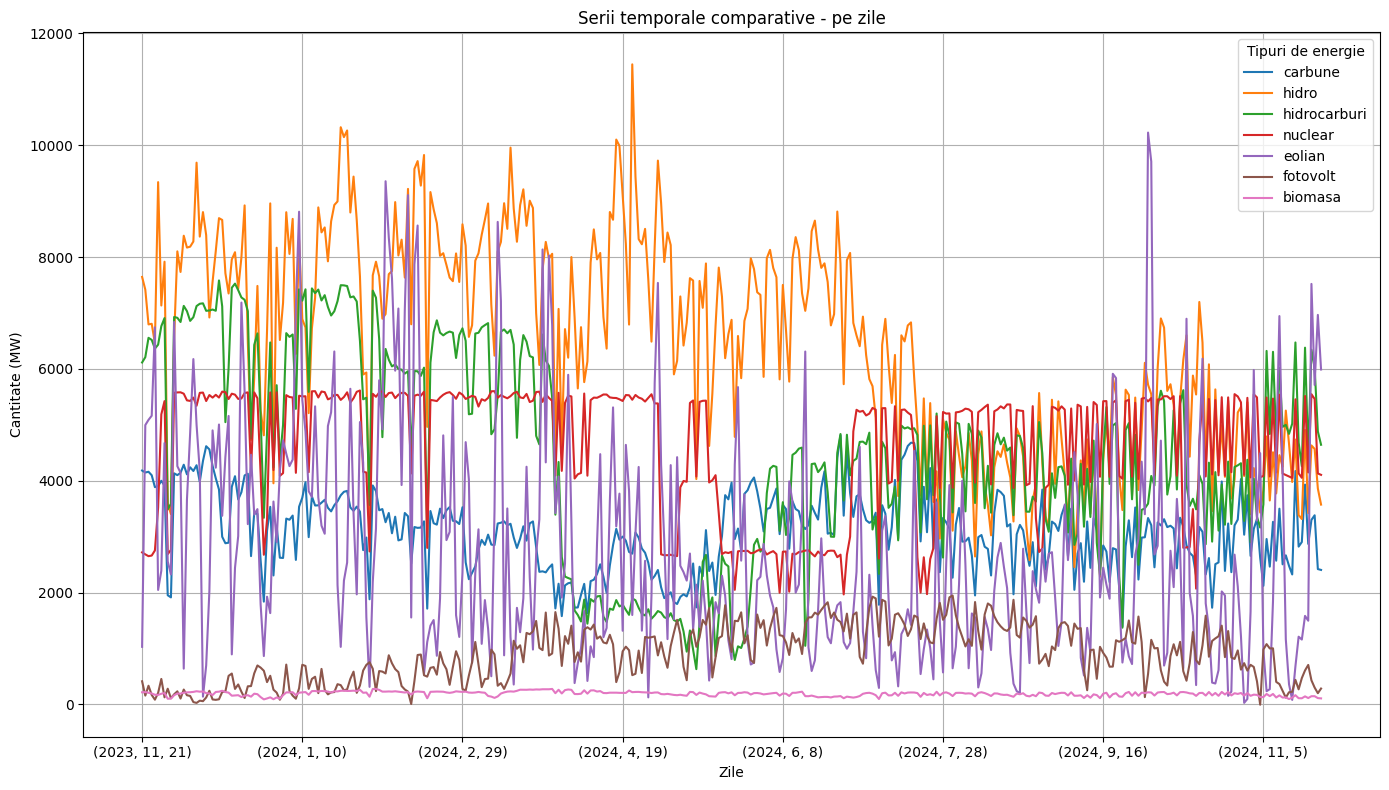

In [ ]:
daily_series = data.groupby(['year', 'month', 'day'])[energy_types].sum()

# Построение сравнительного графика
plt.figure(figsize=(14, 8))
for energy in energy_types:
    daily_series[energy].plot(label=energy)
plt.title('Serii temporale comparative - pe zile')
plt.xlabel('Zile')
plt.ylabel('Cantitate (MW)')
plt.legend(title="Tipuri de energie")
plt.grid(True)
plt.tight_layout()
plt.show()

## Luni

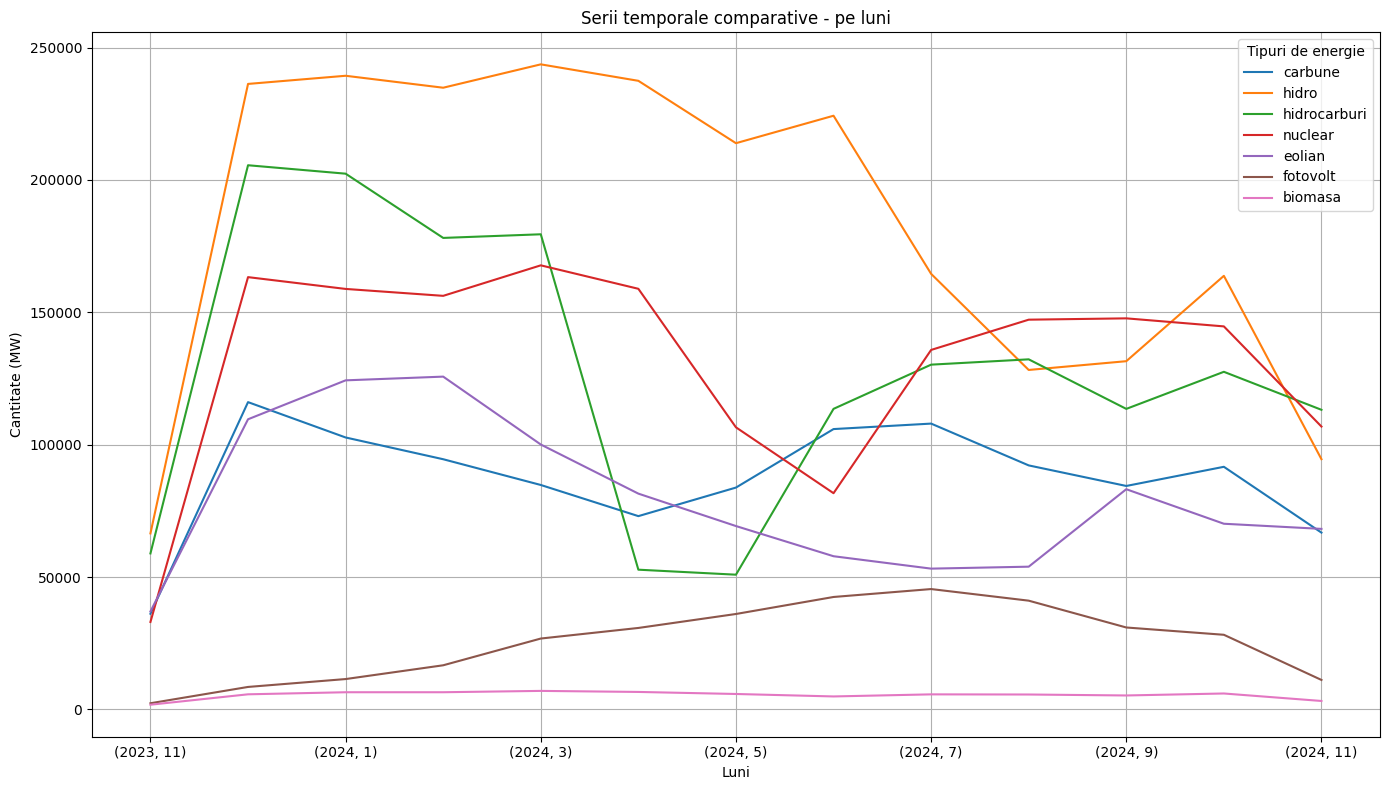

In [ ]:
monthly_series = data.groupby(['year', 'month'])[energy_types].sum()

# Построение сравнительного графика
plt.figure(figsize=(14, 8))
for energy in energy_types:
    monthly_series[energy].plot(label=energy)
plt.title('Serii temporale comparative - pe luni')
plt.xlabel('Luni')
plt.ylabel('Cantitate (MW)')
plt.legend(title="Tipuri de energie")
plt.grid(True)
plt.tight_layout()
plt.show()
